In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [27]:
titanic_df = pd.read_csv("./titanic/train.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
titanic_df["Age"].fillna(titanic_df["Age"].mean(), inplace = True)
titanic_df["Cabin"].fillna("N", inplace = True)
titanic_df["Embarked"].fillna("N", inplace = True)

print("dataset Null's count:\n",titanic_df.isnull().sum())

dataset Null's count:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [40]:
titanic_df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [41]:
titanic_df["Cabin"].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [42]:
titanic_df["Embarked"].value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [43]:
titanic_df["Cabin"] = titanic_df["Cabin"].str[:1]
titanic_df["Cabin"].head()

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object

In [44]:
titanic_df.groupby(["Sex", "Survived"])["Survived"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

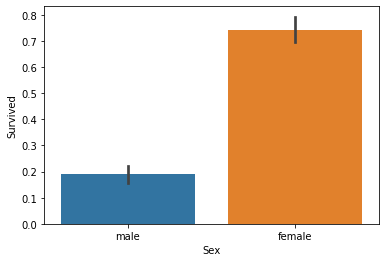

In [45]:
sns.barplot(x = "Sex", y = "Survived", data = titanic_df)
plt.show()

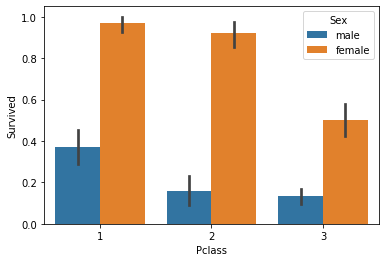

In [46]:
sns.barplot(x = "Pclass", y = "Survived", hue = "Sex", data = titanic_df)
plt.show()

In [47]:
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

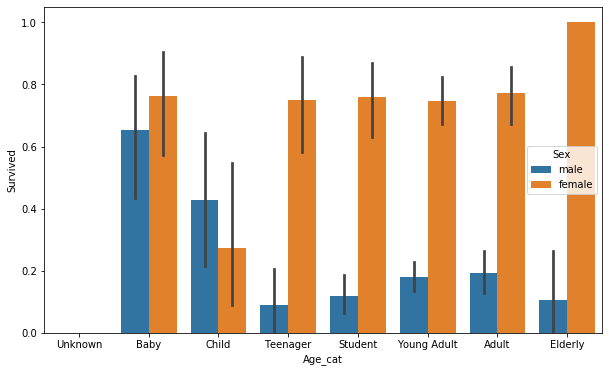

In [48]:
# 막대그래프의 크기 figure를 더 크게 설정 
plt.figure(figsize=(10,6))

#X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y = 'Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [51]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ["Cabin", "Sex", "Embarked"]
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    return dataDF

In [52]:
titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [53]:
from sklearn.preprocessing import LabelEncoder

def fillna(df):
    df["Age"].fillna(df["Age"].mean(), inplace = True)
    df["Cabin"].fillna("N", inplace = True)
    df["Embarked"].fillna("N", inplace = True)
    df["Fare"].fillna(0, inplace = True)
    return df

def drop_feature(df):
    df.drop(["PassengerId", "Name", "Ticket"], axis = 1, inplace = True)
    return df

def format_features(df):
    df["Cabin"] = df["Cabin"].str[:1]
    features = ["Cabin", "Sex", "Embarked"]
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_feature(df)
    df = format_features(df)

    return df

In [54]:
titanic_df = pd.read_csv("./titanic/train.csv")
y_titanic_df = titanic_df["Survived"]
X_titanic_df = titanic_df.drop("Survived", axis = 1)

X_titanic_df = transform_features(X_titanic_df)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state = 11)

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

In [59]:
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print("DecisionTreeClassfier's accuracy : {0:.4f}".format(accuracy_score(y_test, dt_pred)))

rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print("RandomForestClassfier's accuracy : {0:.4f}".format(accuracy_score(y_test, rf_pred)))

lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print("LogisticRegression's accuracy : {0:.4f}".format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassfier's accuracy : 0.7877
RandomForestClassfier's accuracy : 0.8324
LogisticRegression's accuracy : 0.8659


In [61]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds = 5):
    kfold = KFold(n_splits=folds)
    scores = []
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)

        print("교차 검증 {0} 정확도 :{1:.4f}".format(iter_count, accuracy))

    mean_score = np.mean(scores)
    print("평균 정확도 {0:.4f}".format(mean_score))

exec_kfold(dt_clf, 5)

교차 검증 0 정확도 :0.7542
교차 검증 1 정확도 :0.7809
교차 검증 2 정확도 :0.7865
교차 검증 3 정확도 :0.7697
교차 검증 4 정확도 :0.8202
평균 정확도 0.7823


In [62]:
exec_kfold(rf_clf, 5)

교차 검증 0 정확도 :0.7989
교차 검증 1 정확도 :0.7640
교차 검증 2 정확도 :0.8202
교차 검증 3 정확도 :0.7921
교차 검증 4 정확도 :0.8315
평균 정확도 0.8013


In [63]:
exec_kfold(lr_clf, 5)

교차 검증 0 정확도 :0.7933
교차 검증 1 정확도 :0.7921
교차 검증 2 정확도 :0.7753
교차 검증 3 정확도 :0.7472
교차 검증 4 정확도 :0.8427
평균 정확도 0.7901


In [64]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv = 5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도 : {1:.4f}".format(iter_count, accuracy))
print("평균 정확도 {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도 : 0.7430
교차 검증 1 정확도 : 0.7765
교차 검증 2 정확도 : 0.7809
교차 검증 3 정확도 : 0.7753
교차 검증 4 정확도 : 0.8418
평균 정확도 0.7835


In [65]:
from sklearn.model_selection import GridSearchCV
parameters = {"max_depth" : [2, 3, 5, 10],
    "min_samples_split" : [2, 3, 5], 
    "min_samples_leaf" : [1, 5, 8] 
}
grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring="accuracy", cv = 5)
grid_dclf.fit(X_train, y_train)

print("GridSearchCV 최적 하이퍼 파라미터 :", grid_dclf.best_params_)
print("GridSearchCV 최고 정확도:{0:.4f}".format(grid_dclf.best_score_))

best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print("테스트 세트에서의 DecisionTreeClassfier 정확도 : {0:.4f}".format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.7992
테스트 세트에서의 DecisionTreeClassfier 정확도 : 0.8715


In [66]:
grid_dclf = GridSearchCV(rf_clf, param_grid=parameters, scoring="accuracy", cv = 5)
grid_dclf.fit(X_train, y_train)

print("GridSearchCV 최적 하이퍼 파라미터 :", grid_dclf.best_params_)
print("GridSearchCV 최고 정확도:{0:.4f}".format(grid_dclf.best_score_))

best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print("테스트 세트에서의 RandomForestClassifier 정확도 : {0:.4f}".format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.8160
테스트 세트에서의 RandomForestClassifier 정확도 : 0.8771
